<a href="https://colab.research.google.com/github/abdulmanafpv/E-Commerce-Sales-Forecast/blob/main/Sales%20Forecasting%20Model/Amazon_Sales_Forecasting_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Products Search report CSV2.csv to Products Search report CSV2.csv


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.BytesIO(uploaded['Products Search report CSV2.csv']), encoding='latin1')
data

,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),Spend,7 Day Conversion Rate,Total Return on Advertising Spend (RoAS),7 Day Total Orders (#),7 Day Total Units (#),7 Day Total Sales
0,ppe kit for air travel,163,1,0.0,1.1,1.1,0.0,0.0,0,0,0.0
1,ppe kit for air travel,238,1,0.0,2.8,2.8,0.0,0.0,0,0,0.0
2,ppe kit for air travel,333,2,0.0,2.1,4.3,0.0,0.0,0,0,0.0
3,ppe kit for air travel,108,1,0.0,1.4,1.4,0.0,0.0,0,0,0.0
4,ppe kit for air travel,180,2,0.0,2.3,4.7,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13934,school hand sanitizer for kids,8,1,0.1,1.3,1.3,0.0,0.0,0,0,0.0
13935,school sanitizer for kids,4,1,0.3,1.2,1.2,0.0,0.0,0,0,0.0
13936,small sanitizer kids,1,1,1.0,1.3,1.3,0.0,0.0,0,0,0.0
13937,travel children,2,1,0.5,1.3,1.3,0.0,0.0,0,0,0.0


In [ ]:
data.isnull().sum()

Customer Search Term                         0
Impressions                                  0
Clicks                                       0
Click-Thru Rate (CTR)                       10
Cost Per Click (CPC)                        10
Spend                                        0
7 Day Conversion Rate                       10
Total Return on Advertising Spend (RoAS)    10
7 Day Total Orders (#)                       0
7 Day Total Units (#)                        0
7 Day Total Sales                            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelncoder=LabelEncoder()
data['Customer Search Term']=labelncoder.fit_transform(data['Customer Search Term'])

In [ ]:
data.columns

Index(['Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', 'Spend',
       '7 Day Conversion Rate', 'Total Return on Advertising Spend (RoAS)',
       '7 Day Total Orders (#)', '7 Day Total Units (#)',
       '7 Day Total Sales '],
      dtype='object')

In [ ]:
X=data[['Customer Search Term','Impressions', 'Clicks','Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', 'Spend', 'Total Return on Advertising Spend (RoAS)']]

In [ ]:
X

,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),Spend,Total Return on Advertising Spend (RoAS)
0,3952,163,1,0.0,1.1,1.1,0.0
1,3952,238,1,0.0,2.8,2.8,0.0
2,3952,333,2,0.0,2.1,4.3,0.0
3,3952,108,1,0.0,1.4,1.4,0.0
4,3952,180,2,0.0,2.3,4.7,0.0
...,...,...,...,...,...,...,...
13934,4245,8,1,0.1,1.3,1.3,0.0
13935,4248,4,1,0.3,1.2,1.2,0.0
13936,4395,1,1,1.0,1.3,1.3,0.0
13937,4670,2,1,0.5,1.3,1.3,0.0


In [ ]:
X.columns

Index(['Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', 'Spend',
       'Total Return on Advertising Spend (RoAS)'],
      dtype='object')

In [ ]:
Y=data['7 Day Total Sales ']

In [ ]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13934    0.0
13935    0.0
13936    0.0
13937    0.0
13938    0.0
Name: 7 Day Total Sales , Length: 13939, dtype: float64

In [ ]:
X.isnull().sum()

Customer Search Term                         0
Impressions                                  0
Clicks                                       0
Click-Thru Rate (CTR)                       10
Cost Per Click (CPC)                        10
Spend                                        0
Total Return on Advertising Spend (RoAS)    10
dtype: int64

In [ ]:
X['Click-Thru Rate (CTR)'].fillna(int(X['Click-Thru Rate (CTR)'].mean()),inplace=True)
X['Cost Per Click (CPC)'].fillna(int(X['Cost Per Click (CPC)'].mean()),inplace=True)
X['Total Return on Advertising Spend (RoAS)'].fillna(int(X['Total Return on Advertising Spend (RoAS)'].mean()),inplace=True)
X

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),Spend,Total Return on Advertising Spend (RoAS)
0,3952,163,1,0.0,1.1,1.1,0.0
1,3952,238,1,0.0,2.8,2.8,0.0
2,3952,333,2,0.0,2.1,4.3,0.0
3,3952,108,1,0.0,1.4,1.4,0.0
4,3952,180,2,0.0,2.3,4.7,0.0
...,...,...,...,...,...,...,...
13934,4245,8,1,0.1,1.3,1.3,0.0
13935,4248,4,1,0.3,1.2,1.2,0.0
13936,4395,1,1,1.0,1.3,1.3,0.0
13937,4670,2,1,0.5,1.3,1.3,0.0


In [ ]:
X.isnull().sum()

Customer Search Term                        0
Impressions                                 0
Clicks                                      0
Click-Thru Rate (CTR)                       0
Cost Per Click (CPC)                        0
Spend                                       0
Total Return on Advertising Spend (RoAS)    0
dtype: int64

In [ ]:
X.columns

Index(['Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', 'Spend',
       'Total Return on Advertising Spend (RoAS)'],
      dtype='object')

In [ ]:
Y.isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.shape

(9757, 7)

In [ ]:
Y_train.shape

(9757,)

In [ ]:
from keras.layers import Dense, Activation
from keras.models import Sequential
deep_model=Sequential()
deep_model.add(Dense(32, activation='relu',input_dim=7))
deep_model.add(Dense(units=32,activation='relu'))
deep_model.add(Dense(units=32,activation='relu'))
deep_model.add(Dense(units=1))

In [ ]:
deep_model.compile(optimizer='adam',loss='mean_squared_error')
deep_model.fit(X_train,Y_train,batch_size=20,epochs=1000)

Epoch 1/1000
488/488 [==============================] - 1s 2ms/step - loss: 1637.6658
Epoch 2/1000
488/488 [==============================] - 1s 2ms/step - loss: 1437.9534
Epoch 3/1000
488/488 [==============================] - 1s 2ms/step - loss: 1296.0642
Epoch 4/1000
488/488 [==============================] - 1s 2ms/step - loss: 1109.8064
Epoch 5/1000
488/488 [==============================] - 1s 2ms/step - loss: 966.2550
Epoch 6/1000
488/488 [==============================] - 1s 2ms/step - loss: 748.9247
Epoch 7/1000
488/488 [==============================] - 1s 2ms/step - loss: 566.3185
Epoch 8/1000
488/488 [==============================] - 1s 2ms/step - loss: 538.3909
Epoch 9/1000
488/488 [==============================] - 1s 2ms/step - loss: 475.2137
Epoch 10/1000
488/488 [==============================] - 1s 2ms/step - loss: 481.2397
Epoch 11/1000
488/488 [==============================] - 1s 2ms/step - loss: 477.1440
Epoch 12/1000
488/488 [==============================] - 1s

In [ ]:
deep_pred=deep_model.predict(X_test)
print('predicted values by using ANN',deep_pred)

predicted values by using ANN [[0.0548914]
 [0.0548914]
 [0.0548914]
 ...
 [0.0548914]
 [0.0548914]
 [0.0548914]]


In [ ]:
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
deep_score=r2_score(Y_test,deep_pred)
print('ANN score',deep_score)

ANN score 0.9848026446188277


In [ ]:
error=mean_squared_error(Y_test,deep_pred)
print('mean squared error by using ANN',error)

mean squared error by using ANN 189.07563996201395


In [ ]:
import numpy as np
deep_pred_1D_array=deep_pred.flatten()

In [ ]:
Y_true=Y_test
Predicted_data={'True Sale value' : Y_true,
         'predicted values by using ANN': deep_pred_1D_array}
Predicted_data=pd.DataFrame(Predicted_data)
Predicted_data

,True Sale value,predicted values by using ANN
3753,0.0,0.054891
9492,0.0,0.054891
11271,0.0,0.054891
6493,0.0,0.054891
7451,0.0,0.054891
...,...,...
6171,0.0,0.054891
13065,0.0,0.054891
12309,0.0,0.054891
10631,0.0,0.054891


In [ ]:
Predicted_data.tail()

,True Sale value,predicted values by using ANN
6171,0.0,0.054891
13065,0.0,0.054891
12309,0.0,0.054891
10631,0.0,0.054891
5206,0.0,0.054891


In [ ]:
Predicted_data.head()

,True Sale value,predicted values by using ANN
3753,0.0,0.054891
9492,0.0,0.054891
11271,0.0,0.054891
6493,0.0,0.054891
7451,0.0,0.054891


In [ ]:
Predicted_data[0:60]

,True Sale value,predicted values by using ANN
3753,0.0,0.054891
9492,0.0,0.054891
11271,0.0,0.054891
6493,0.0,0.054891
7451,0.0,0.054891
8277,0.0,0.054891
10379,0.0,0.054891
5938,0.0,0.054891
5050,0.0,0.054891
7081,0.0,0.054891


In [ ]:
Predicted_data[0:100]

,True Sale value,predicted values by using ANN
3753,0.0,0.054891
9492,0.0,0.054891
11271,0.0,0.054891
6493,0.0,0.054891
7451,0.0,0.054891
...,...,...
6416,0.0,0.054891
8531,0.0,0.054891
12174,0.0,0.054891
10574,0.0,0.054891


In [ ]:
Predicted_data[450:510]

,True Sale value,predicted values by using ANN
8119,0.0,0.054891
4694,0.0,0.054891
8156,0.0,0.054891
4218,0.0,0.054891
1083,0.0,0.054891
10569,0.0,0.054891
11870,0.0,0.054891
4599,0.0,0.054891
4119,0.0,0.054891
5773,0.0,0.054891


In [ ]:
Predicted_data[550:610]

,True Sale value,predicted values by using ANN
12236,0.0,0.054891
1364,0.0,0.054891
5793,0.0,0.054891
12788,0.0,0.054891
13020,0.0,0.054891
5659,0.0,0.054891
11330,0.0,0.054891
12966,0.0,0.054891
3712,0.0,11.084516
11327,0.0,0.054891


In [ ]:
Predicted_data[610:670]

,True Sale value,predicted values by using ANN
997,0.0,0.054891
4220,0.0,0.054891
12575,0.0,0.054891
10097,0.0,0.054891
2559,0.0,0.054891
7596,0.0,0.054891
974,0.0,0.054891
1681,0.0,0.054891
6356,0.0,0.054891
8841,0.0,0.054891


In [ ]:
Predicted_data[670:730]

,True Sale value,predicted values by using ANN
12538,16.0,8.442718
3101,0.0,0.054891
12475,0.0,0.054891
5458,0.0,0.054891
3529,15.5,17.692122
10298,0.0,0.054891
6247,0.0,0.054891
11361,0.0,0.054891
334,0.0,0.054891
7443,0.0,0.054891


In [ ]:
Predicted_data[730:790]

,True Sale value,predicted values by using ANN
1373,0.0,0.054891
4552,0.0,0.054891
6083,0.0,0.054891
13669,0.0,0.054891
8369,0.0,0.054891
5974,0.0,0.054891
11499,0.0,0.054891
3414,0.0,0.054891
6745,0.0,0.054891
6119,0.0,0.054891


In [ ]:
Predicted_data[800:860]

,True Sale value,predicted values by using ANN
12508,0.0,0.054891
3254,0.0,0.054891
13485,0.0,0.054891
3750,0.0,0.054891
12616,0.0,0.054891
3062,0.0,1.099632
11219,0.0,0.054891
7450,0.0,0.054891
2825,42.6,31.789526
11599,0.0,0.054891


In [ ]:
Predicted_data[900:960]

,True Sale value,predicted values by using ANN
2859,0.0,0.054891
13600,0.0,2.554933
11338,0.0,0.054891
12118,0.0,0.054891
8657,0.0,0.054891
5474,0.0,0.054891
10636,0.0,0.054891
4505,0.0,0.054891
10841,0.0,0.054891
4494,7.8,2.131139


In [ ]:
Predicted_data[1000:1060]

,True Sale value,predicted values by using ANN
10212,0.0,0.054891
4516,0.0,0.054891
8422,0.0,0.054891
8669,0.0,0.054891
6947,0.0,0.054891
9580,0.0,0.054891
2066,0.0,0.054891
797,0.0,0.054891
6061,0.0,0.054891
9431,0.0,0.054891


In [ ]:
Predicted_data[2000:2060]

,True Sale value,predicted values by using ANN
3810,0.0,0.054891
1002,0.0,0.054891
11838,0.0,0.054891
13757,0.0,0.054891
1524,0.0,0.054891
5171,0.0,0.054891
740,0.0,0.054891
3435,0.0,0.054891
4999,0.0,0.054891
6067,0.0,0.054891


In [ ]:
Predicted_data[1060:1120]

,True Sale value,predicted values by using ANN
10942,0.0,0.054891
11263,0.0,0.054891
8414,25.4,31.300480
12766,0.0,0.054891
6308,0.0,0.054891
9183,0.0,0.054891
3873,0.0,0.054891
11783,0.0,0.054891
554,0.0,0.054891
9645,0.0,0.054891


In [ ]:
Predicted_data[1120:1180]

,True Sale value,predicted values by using ANN
5070,0.0,0.054891
10964,26.4,27.922047
4024,0.0,0.054891
726,0.0,0.054891
7467,0.0,0.054891
5448,17.0,12.322914
12653,0.0,0.054891
11672,0.0,0.054891
1013,0.0,0.054891
13234,0.0,0.054891


In [ ]:
Predicted_data[1200:1260]

,True Sale value,predicted values by using ANN
7410,0.0,0.054891
5506,0.0,0.054891
4235,7.8,2.882221
13547,0.0,0.054891
5844,0.0,0.054891
2759,0.0,0.054891
8230,0.0,0.054891
6487,0.0,0.054891
1182,0.0,0.054891
3804,0.0,0.054891


In [ ]:
Predicted_data[1400:1460]

,True Sale value,predicted values by using ANN
528,0.0,0.054891
11382,0.0,0.054891
6909,0.0,0.054891
8940,0.0,0.054891
2929,0.0,0.054891
553,0.0,0.054891
6997,0.0,0.054891
12812,0.0,0.054891
679,0.0,0.054891
6459,0.0,0.054891


In [ ]:
Predicted_data[1300:1360]

,True Sale value,predicted values by using ANN
9868,0.0,0.054891
1794,0.0,0.054891
9678,0.0,0.054891
4967,0.0,0.054891
5021,0.0,0.054891
4458,0.0,0.054891
11056,0.0,0.054891
12723,0.0,0.054891
11551,0.0,0.054891
1343,0.0,0.054891


In [ ]:
Predicted_data[1500:1560]

,True Sale value,predicted values by using ANN
5695,0.0,0.054891
8808,0.0,0.054891
2656,0.0,0.054891
3346,0.0,0.054891
6412,0.0,0.054891
2922,0.0,0.054891
9059,0.0,0.054891
9529,0.0,0.054891
3231,0.0,0.054891
11348,0.0,0.054891


In [ ]:
Predicted_data[1560:1620]

,True Sale value,predicted values by using ANN
7499,0.0,0.054891
893,0.0,0.054891
13533,0.0,0.054891
4796,0.0,0.054891
10173,0.0,0.054891
9651,0.0,0.054891
5738,0.0,0.054891
8772,0.0,0.054891
5256,0.0,0.054891
9838,0.0,0.054891


In [ ]:
Predicted_data[2000:2060]

,True Sale value,predicted values by using ANN
3810,0.0,0.054891
1002,0.0,0.054891
11838,0.0,0.054891
13757,0.0,0.054891
1524,0.0,0.054891
5171,0.0,0.054891
740,0.0,0.054891
3435,0.0,0.054891
4999,0.0,0.054891
6067,0.0,0.054891


In [ ]:
Predicted_data[4000:4060]

,True Sale value,predicted values by using ANN
8600,0.0,0.054891
5652,0.0,0.054891
4540,0.0,0.054891
6293,0.0,0.054891
2039,0.0,0.054891
6983,0.0,0.054891
13224,0.0,0.054891
4950,0.0,0.054891
12095,0.0,0.054891
9196,0.0,0.054891


In [ ]:
Predicted_data[700:760]

,True Sale value,predicted values by using ANN
12259,0.0,0.054891
8568,0.0,0.054891
13633,0.0,0.054891
6190,0.0,0.054891
10654,0.0,0.054891
11603,0.0,0.054891
12022,0.0,0.054891
8580,0.0,0.054891
7998,0.0,0.054891
5546,0.0,0.054891


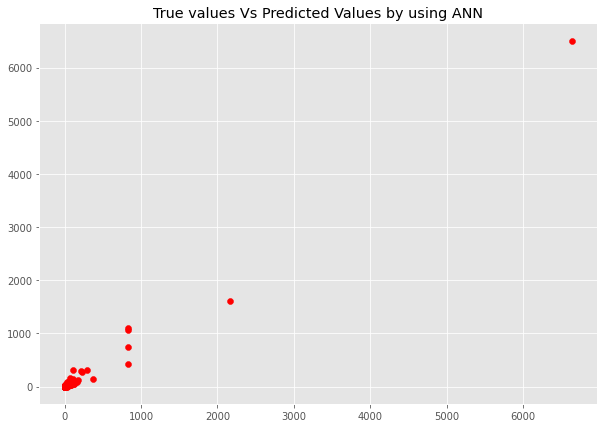

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Sale value'],Predicted_data['predicted values by using ANN'],color='red')
plt.title("True values Vs Predicted Values by using ANN")
plt.show()

Here i used 3 layer Artificial Neural Network. In this model have 2 hidden layers. In each layer there have 32 units.

Features used : ['Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', 'Spend',
       'Total Return on Advertising Spend (RoAS)']

This is the Final one..The score of the model is 98